# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mdata_df = pd.merge(mouse_metadata, study_results, how = 'left', on = 'Mouse ID')

# Display the data table for preview
mdata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
count = mdata_df['Mouse ID'].value_counts()
count

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouseID = mdata_df.loc[mdata_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouseID

array(['g989'], dtype=object)

In [32]:
## Optional: Get all the data for the duplicate mouse ID.
dup_mouse_df = mdata_df.loc[mdata_df['Mouse ID']=='g989']
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mdata_df[mdata_df['Mouse ID'].isin(dup_mouseID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].nunique()

mice_count

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
summary_table = pd.DataFrame({'Mean Tumor Volume':mean, 
'Median Tumor Volume':median, 'Tumor Volume Variance':var, 'Tumor Volume Std. Dev.':std,  'Tumor Volume Std. Err.':sem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_table =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

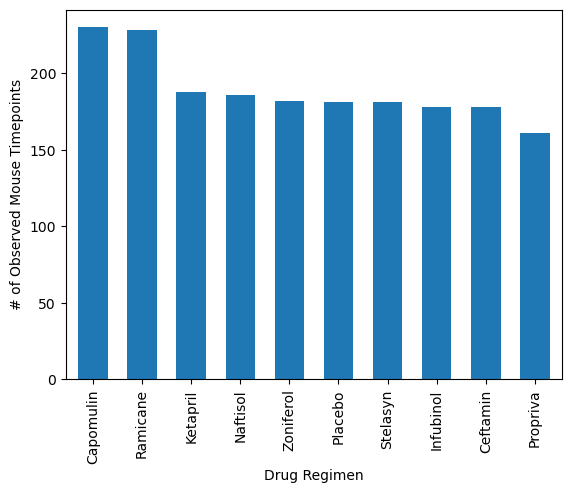

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_plot = mdata_df['Drug Regimen'].value_counts().plot.bar(width=0.6)
drug_plot.set_xlabel('Drug Regimen')
drug_plot.set_ylabel('# of Observed Mouse Timepoints')

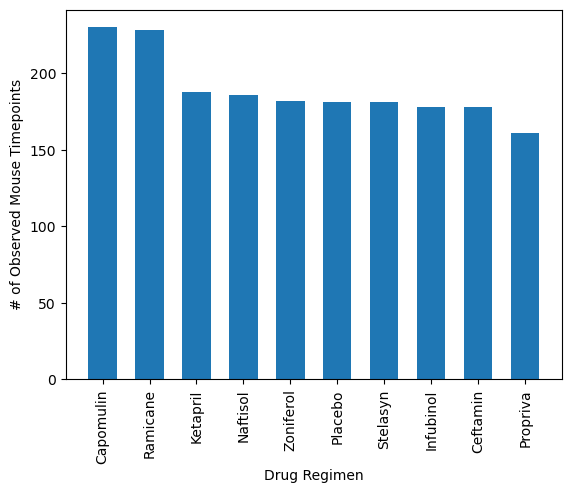

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
dvalues = mdata_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(dvalues))
plt.bar(x_axis, dvalues, width = 0.6)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, dvalues.index.values)
plt.xticks(rotation=90)

plt.show()

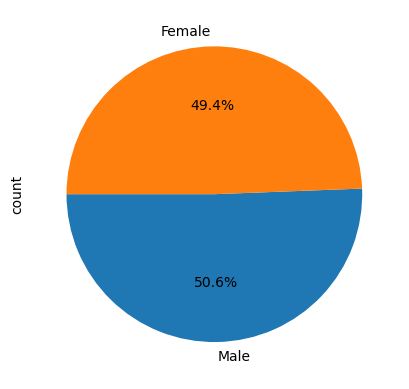

In [40]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_data = mdata_df['Sex'].value_counts()
pie_plot = sex_data.plot.pie(autopct='%1.1f%%', startangle=180)

pie_plot.set_ylabel('count')

# Make the pie chart
plt.show()


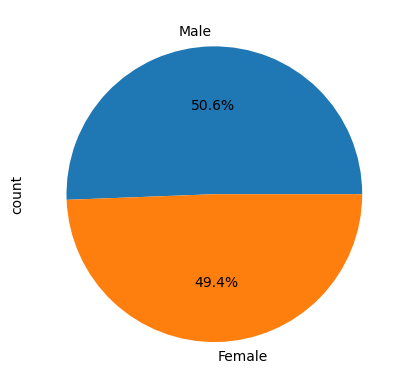

In [41]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ['Female', 'Male']
plot = sex_data.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.ylabel('count')

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = clean_df[clean_df['Drug Regimen'].isin(drugs_list)]
drugs.head()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drugs_list:
    print(drug)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin
Ramicane
Infubinol
Ceftamin


In [46]:
Capomulin_df = clean_df[clean_df['Drug Regimen']=='Capomulin'] 

In [43]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
treatment = 0
for drug in drugs_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

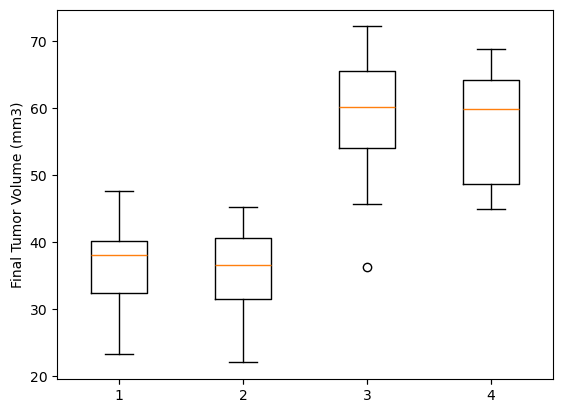

In [47]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
box_list = []
for drug in drugs_list:
    box_list.append(list(last_timepoint[drug].dropna()))
fig = plt.figure()
plt.xticks([1,2,3,4], drugs_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(box_list)
plt.show()    

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

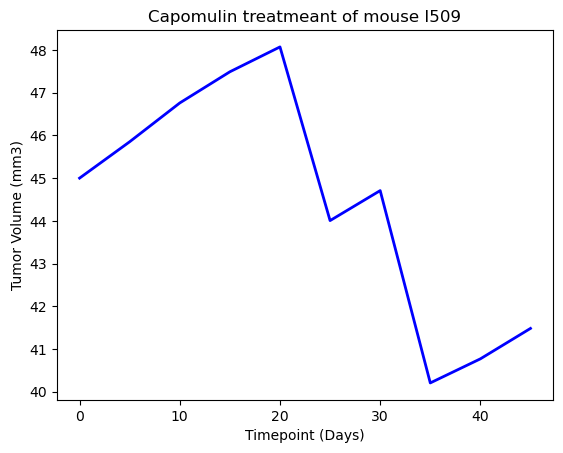

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 'l509',:]
forline_df.head()
x_axis = forline_df['Timepoint']
tumor_size = forline_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse I509')
plt.plot(x_axis, tumor_size, linewidth=2, color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


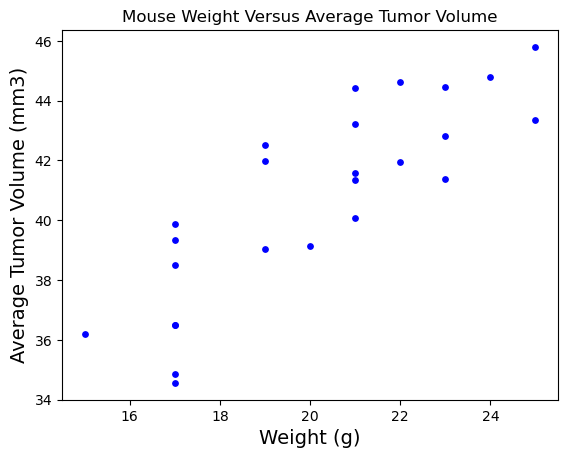

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
cap_vol = Capomulin_df[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby(['Mouse ID']).mean().reset_index()
Capomulin_df[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby(['Mouse ID']).mean().reset_index()
marker_size = 15
plt.scatter(cap_vol['Weight (g)'], cap_vol['Tumor Volume (mm3)'], color='blue', s=marker_size)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.show() 

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(cap_vol['Weight (g)'], cap_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}") 

The correlation between mouse weight and average tumor volume is: 0.84


In [52]:
model=st.linregress(cap_vol['Weight (g)'],cap_vol['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [54]:
slope = 0.9544396890241045
intercept = 21.552160532685015

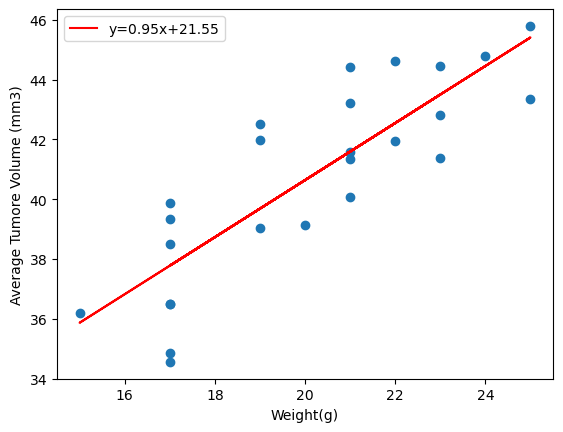

In [55]:
line = slope*(cap_vol['Weight (g)'])+intercept
plt.scatter(cap_vol['Weight (g)'],cap_vol['Tumor Volume (mm3)'])
plt.plot(cap_vol['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show() 